In [66]:
import tensorflow as tf
import tensorflow.keras

import numpy as np
import matplotlib.pyplot as plt

tensorflow.__version__

'2.2.0'

In [0]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [143]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_dict=dict()

for i in range(len(class_names)):
  class_dict[class_names[i]]=i

print(class_dict)

reverse_class_dict = {value: key for key,value in class_dict.items()}

print(reverse_class_dict)

{'T-shirt/top': 0, 'Trouser': 1, 'Pullover': 2, 'Dress': 3, 'Coat': 4, 'Sandal': 5, 'Shirt': 6, 'Sneaker': 7, 'Bag': 8, 'Ankle boot': 9}
{0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}


In [68]:
print(type(train_labels))
print(train_labels.shape)
train_labels[0]

<class 'numpy.ndarray'>
(60000,)


9

In [69]:
type(train_images)
train_images.shape
#train_images[0]

(60000, 28, 28)

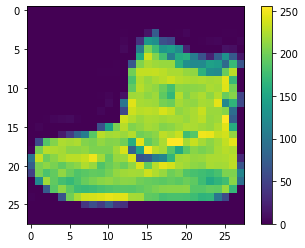

In [70]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
FAST = True
HEIGHT = 28
WIDTH = 28
CHANELS = 1
BATCH_SIZE=64

In [0]:
train_images =train_images/255.0
test_images = test_images/255.0

In [73]:
train_images.shape

(60000, 28, 28)

(60000, 28, 28)


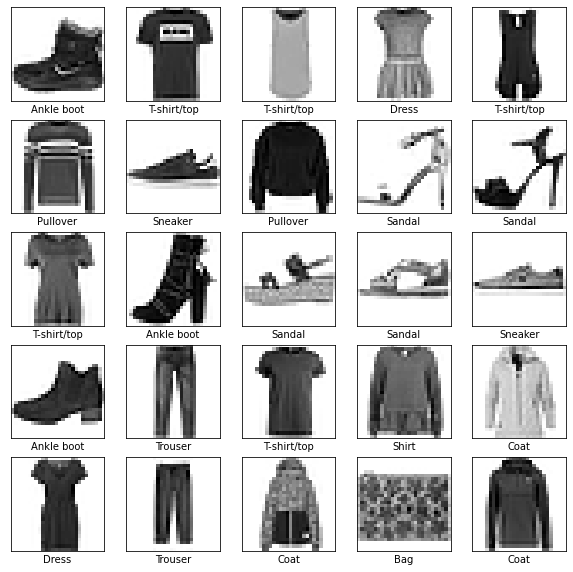

In [147]:
plt.figure(figsize=(10,10))

if train_images.ndim >3:
  plotting_data = np.squeeze(train_images,axis=-1)
  print(plotting_data.shape)
else:
  plotting_data=train_images

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(plotting_data[i], cmap=plt.cm.binary)
    plt.xlabel(reverse_class_dict[train_labels[i]])
plt.show()

In [75]:
train_images= np.expand_dims(train_images, axis=-1)
test_images= np.expand_dims(test_images, axis=-1)
print(train_images.shape)

(60000, 28, 28, 1)


In [0]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()

model.add(tf.keras.layers.InputLayer(input_shape=(HEIGHT,WIDTH,CHANELS)))

model.add(layers.BatchNormalization())

model.add(layers.Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Dropout(0.1))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Dropout(0.2))

model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))

model.add(layers.Dropout(0.5))

model.add(layers.Dense(64,activation='relu'))

model.add(layers.BatchNormalization())

model.add(layers.Dense(10,activation='softmax'))

In [127]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_16 (Batc (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 6, 6, 64)        

In [0]:
from tensorflow.keras import optimizers
from tensorflow.keras import losses

model.compile(optimizer = 'adam', loss=losses.SparseCategoricalCrossentropy(from_logits=True),metrics = ['acc'])

In [131]:
FAST = False
if FAST:
  NB_EPOCHS = 5
else:
  NB_EPOCHS = 50

checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath="weights.hdf5", verbose=1, save_best_only=True)

history=model.fit(train_images,train_labels,BATCH_SIZE,NB_EPOCHS,validation_data=(test_images,test_labels),callbacks=checkpointer)

Epoch 1/50
938/938 [==============================] - ETA: 0s - loss: 1.6702 - acc: 0.8034
Epoch 00001: val_loss improved from inf to 1.60080, saving model to weights.hdf5
938/938 [==============================] - 9s 10ms/step - loss: 1.6702 - acc: 0.8034 - val_loss: 1.6008 - val_acc: 0.8612
Epoch 2/50
935/938 [============================>.] - ETA: 0s - loss: 1.5967 - acc: 0.8672
Epoch 00002: val_loss improved from 1.60080 to 1.58155, saving model to weights.hdf5
938/938 [==============================] - 9s 10ms/step - loss: 1.5967 - acc: 0.8672 - val_loss: 1.5816 - val_acc: 0.8796
Epoch 3/50
935/938 [============================>.] - ETA: 0s - loss: 1.5826 - acc: 0.8805
Epoch 00003: val_loss did not improve from 1.58155
938/938 [==============================] - 9s 10ms/step - loss: 1.5825 - acc: 0.8806 - val_loss: 1.5875 - val_acc: 0.8723
Epoch 4/50
936/938 [============================>.] - ETA: 0s - loss: 1.5770 - acc: 0.8856
Epoch 00004: val_loss improved from 1.58155 to 1.5703

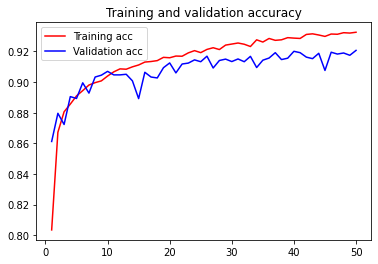

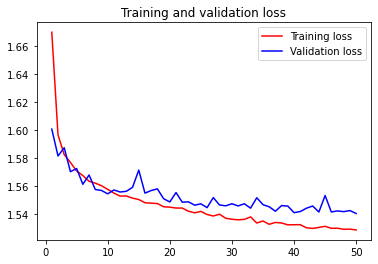

In [135]:
acc = history.history['acc']
val_acc = history.history['val_acc'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
model.load_weights('/content/weights.hdf5')

In [134]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 1.5404 - acc: 0.9207


[1.5403649806976318, 0.9207000136375427]

In [0]:
prediction = model.predict(test_images)

In [141]:
print(prediction[0])
print(np.argmax(prediction[0]))
test_labels[0]

[3.1840913e-26 6.9909339e-23 2.7064210e-25 2.6630827e-23 1.9953243e-24
 6.1724075e-27 7.6067401e-28 3.9933328e-19 2.5869723e-24 1.0000000e+00]
9


9

(10000, 28, 28)


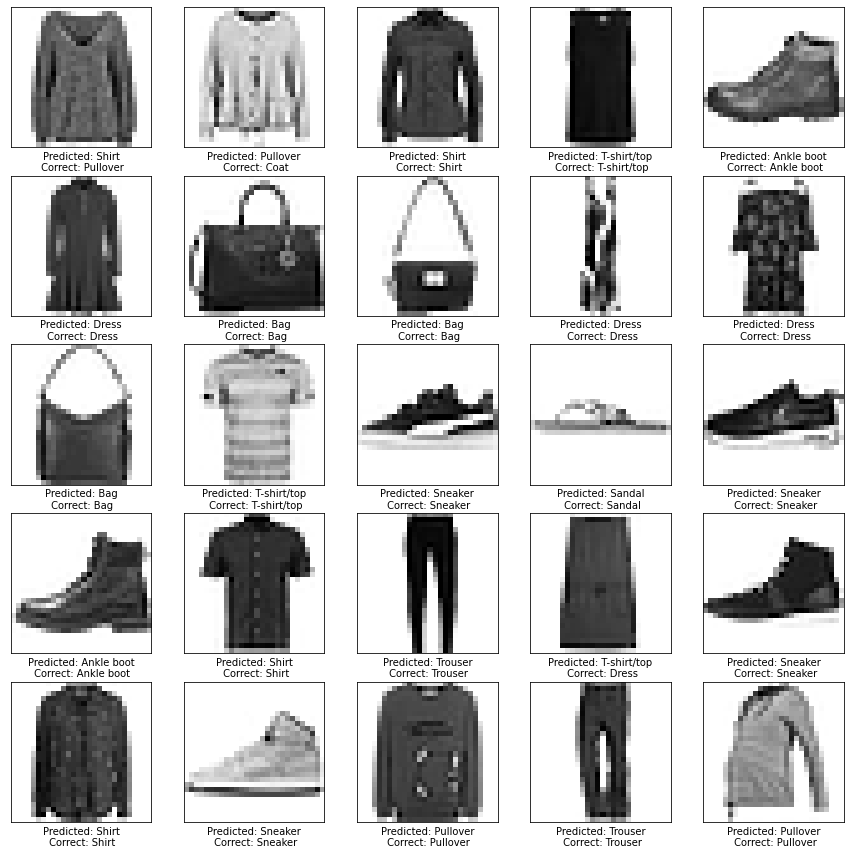

In [159]:
plt.figure(figsize=(15,15))

if train_images.ndim >3:
  plotting_data = np.squeeze(test_images,axis=-1)
  print(plotting_data.shape)
else:
  plotting_data=test_images

for i in range(25,50):
    plt.subplot(5,5,(i+1)%25+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(plotting_data[i], cmap=plt.cm.binary)
    plt.xlabel('Predicted: ' + reverse_class_dict[np.argmax(prediction[i])] + '\n Correct: ' + reverse_class_dict[test_labels[i]])
plt.show()

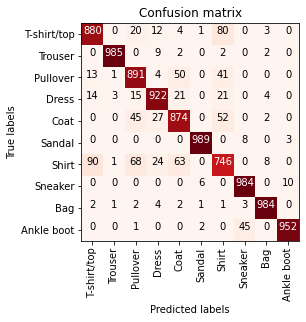

In [181]:
import itertools

cm=tf.math.confusion_matrix(test_labels, np.argmax(prediction,axis=1))


plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Reds)
plt.title('Confusion matrix')
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=90)
plt.yticks(tick_marks, class_names)

fmt = 'd'
thresh = np.max(np.asarray(cm)) / 2.

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i,j], fmt),
              horizontalalignment="center",
              color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True labels')
plt.xlabel('Predicted labels')
plt.show()